In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def generate_non_trivial(n):
    sequence = [2]
    difference = 1 
    
    for _ in range(1, n):
        if _ % 2 == 0:
            difference += 1
        sequence.append(sequence[-1] + difference)
    
    return sequence

generate_non_trivial(20)

[2, 3, 5, 7, 10, 13, 17, 21, 26, 31, 37, 43, 50, 57, 65, 73, 82, 91, 101, 111]

In [9]:
def find_pos(m):
    n = 1
    previous_non_trivial = None
    non_trivial_index = None

    if m == 1:
        return (0, 0)
    if m == 2:
        return (1, 0)

    while True:
        sequence = generate_non_trivial(n)
        if sequence[-1] >= m:
            break
        n *= 2

    for i in range(len(sequence) - 1, -1, -1):
        if sequence[i] < m:
            previous_non_trivial = sequence[i]
            non_trivial_index = i + 1
            break

    a = np.ceil(non_trivial_index / 4)
    
    if non_trivial_index % 4 == 0:
        return (- a + m - previous_non_trivial, - a)
    elif non_trivial_index % 4 == 1:
        return (a, - a + m - previous_non_trivial + 1)
    elif non_trivial_index % 4 == 2:
        return (a - (m - previous_non_trivial), a )
    elif non_trivial_index % 4 == 3:
        return (- a, a - (m - previous_non_trivial))
    
find_pos(5)

(-1.0, 1.0)

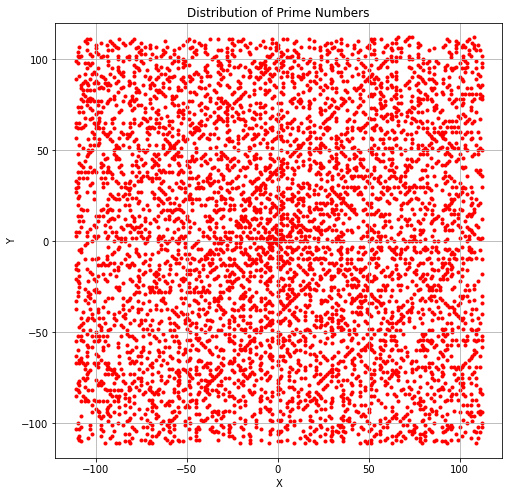

In [12]:
def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(np.sqrt(n)) + 1):
        if n % i == 0:
            return False
    return True

def generate_primes(limit):
    return [n for n in range(2, limit + 1) if is_prime(n)]

primes = generate_primes(50000)
x_coords = []
y_coords = []

for prime in primes:
    x, y = find_pos(prime)
    x_coords.append(x)
    y_coords.append(y)

plt.figure(figsize=(8, 8))
plt.scatter(x_coords, y_coords, c = 'red', marker = '.')
plt.title('Distribution of Prime Numbers')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axis('equal')
plt.show()